In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.style.use('seaborn-notebook')

In [2]:
df_duncan = pd.read_csv("data/Duncan.csv", sep=",")
df_duncan

,name,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90
5,minister,prof,21,84,87
6,professor,prof,64,93,93
7,dentist,prof,80,100,90
8,reporter,wc,67,87,52
9,engineer,prof,72,86,88


In [3]:
X_name, X_type, X_income, X_education, X_prestige = \
           [df_duncan[name].values for name in ('name','type','income', 'education', 'prestige')]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


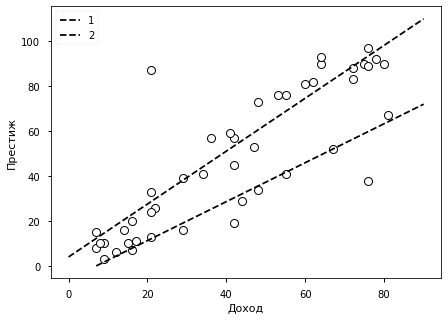

In [4]:
plt.figure(figsize=(7,5))
# plt.figure(figsize=(15,12))
plt.scatter(X_income, X_prestige, s=64, c='w', edgecolors='k', linewidth=1.0)
plt.title("Доход и престиж")
plt.plot([7, 90], [0, 72], linestyle='--', label='1', color='k')
plt.plot([0, 90], [4, 110], linestyle='--', label='2', color='k')
# for x_name, x_income, x_prestige in zip(X_name, X_income, X_prestige):
#     plt.text(x_income, x_prestige+2, x_name)
plt.xlabel('Доход')
plt.ylabel('Престиж')
plt.legend()
plt.savefig('fig/duncan_income_education.eps')
plt.show()

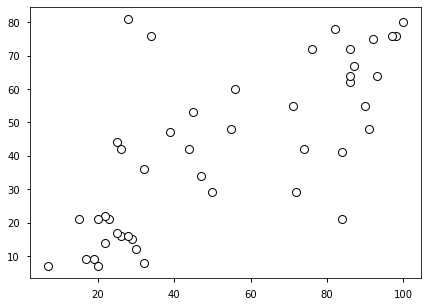

In [5]:
plt.figure(figsize=(7,5))
#plt.figure(figsize=(15,12))
plt.scatter(X_education, X_income, s=64, c='w', edgecolors='k', linewidth=1.0)
# plt.plot([7, 90], [0, 72], linestyle='--', label='1', color='k')
# plt.plot([0, 90], [4, 110], linestyle='--', label='2', color='k')
# for x_name, x_education, x_income in zip(X_name, X_education, X_income):
#     plt.text(x_education, x_income+2, x_name)
# plt.xlabel('Доход')
# plt.ylabel('Престиж')
# plt.legend()
plt.show()

In [3]:
tonedata = pd.read_csv("data/tonedata.csv", sep=" ")
tonedata

,stretchratio,tuned
0,1.35,1.461
1,1.40,1.407
2,1.45,1.452
3,1.50,1.300
4,1.55,1.351
...,...,...
145,2.75,2.066
146,2.80,2.426
147,2.85,2.117
148,2.90,2.097


In [5]:
X_stretchratio = tonedata["stretchratio"].values
X_tuned = tonedata["tuned"].values

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


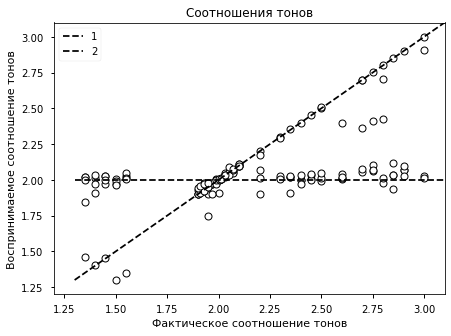

In [24]:
plt.figure(figsize=(7,5))
# plt.figure(figsize=(15,12))
plt.scatter(X_stretchratio, X_tuned, s=49, c='w', edgecolors='k', linewidth=1.0)
plt.title("Соотношения тонов")
plt.plot([1.3, 3.2], [2.0, 2.0], linestyle='--', label='1', color='k')
plt.plot([1.3, 3.2], [1.3, 3.2], linestyle='--', label='2', color='k')
# for x_name, x_income, x_prestige in zip(X_name, X_income, X_prestige):
#     plt.text(x_income, x_prestige+2, x_name)
plt.xlabel('Фактическое соотношение тонов')
plt.ylabel('Воспринимаемое соотношение тонов')
plt.ylim(1.2, 3.1)
plt.xlim(1.2, 3.1)
plt.legend()
plt.savefig('fig/tonedata_scatter.eps')
plt.show()